# Softmax Regression for a Multi-Label Classification of Images

## import library

In [1]:
import sys
sys.path.append('/Users/hong/class/NeuralNetwork/2025/assignment/02')
! python -m pip install --upgrade pip
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cpu
Ignoring tomli: markers 'python_full_version < "3.11.2"' don't match your environment


In [2]:
import os
from pyexpat import model
import torch
from torchvision import transforms
from tqdm.auto import tqdm
from torch.utils.data import DataLoader
from torch import nn
import matplotlib.pyplot as plt
import statistics

In [3]:
from MyDataset import MyDataset
from MyEval import MyEval
from MyModel import MyModel
from MyOptim import MyOptim
from MyResult import MyResult

## construct dataset 

In [4]:
dataset = MyDataset(path='data', split='train')

## construct dataloader

In [5]:
batch_size = 64
dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True, shuffle=True)

## plot the dataset

In [6]:
iter_data       = iter(dataloader)
(data, label)   = next(iter_data)
print(data.shape, label.shape)
print(data.dtype, label.dtype)

torch.Size([64, 1, 16, 16]) torch.Size([64])
torch.float32 torch.uint8


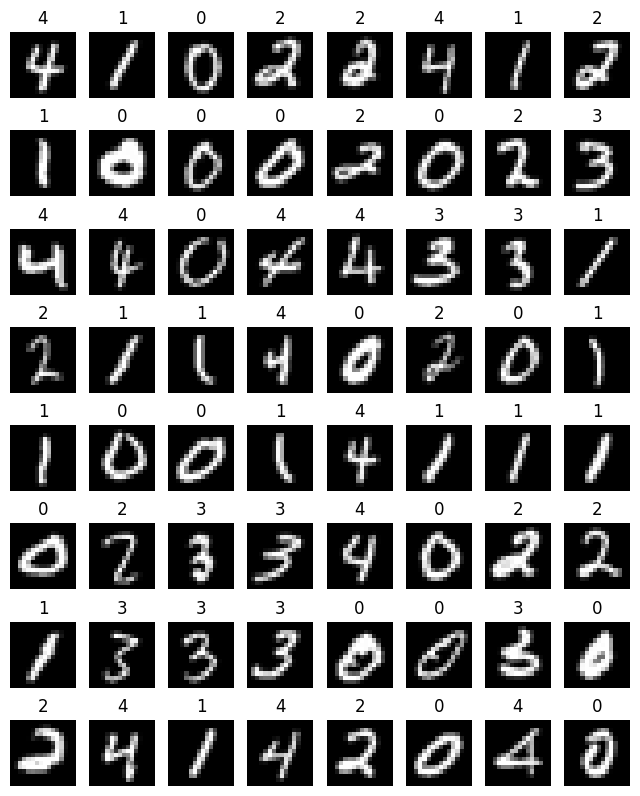

In [7]:
nRow = 8
nCol = 8
plt.figure(figsize=(nRow, nCol+2))
for i in range(nRow):
    for j in range(nCol):
        idx = nCol * i + j
        plt.subplot(nRow, nCol, idx+1)
        plt.axis('off')
        plt.title(f'{int(label[idx])}')
        plt.imshow(data[idx].squeeze(0), cmap='gray')
plt.show()

## flatten data

In [8]:
vec = nn.Flatten()(data)
print(data.shape, data.dtype)
print(vec.shape, vec.dtype)

torch.Size([64, 1, 16, 16]) torch.float32
torch.Size([64, 256]) torch.float32


## construct model

In [9]:
model       = MyModel()
size_model  = model.size()
pred        = model(vec)
print(f'data: {data.shape}')
print(f'input: {vec.shape}')
print(f'output: {pred.shape}')
print(f'label: {label.shape}')
print('model size =', size_model)

data: torch.Size([64, 1, 16, 16])
input: torch.Size([64, 256])
output: torch.Size([64, 5])
label: torch.Size([64])
model size = 16704


## train

In [10]:
eval    = MyEval()
optim   = MyOptim(model,lr=0.2)
result  = MyResult()


model.train()

num_epoch       = 1000
loss_epoch      = []
accuracy_epoch  = []

for epoch in range(num_epoch):
    loss_batch      = []
    accuracy_batch  = []

    for step, (data, label) in enumerate(tqdm(dataloader)):
        
        vec             = nn.Flatten()(data)
        pred            = model(vec)
        accuracy_value  = eval.compute_accuracy(pred, label)

        label_long = label.long()
        N = label.shape[0]
        one_hot = torch.zeros((N, 5), dtype=torch.float32)
        one_hot[torch.arange(N), label_long] = 1.0

        optim.zero_grad()
        optim.Cal_grad(vec,model.a1,pred,one_hot)
        loss = optim.Cal_loss(pred,one_hot)
        optim.step()
        

        loss_batch.append(loss.item())
        accuracy_batch.append(accuracy_value.item())

    loss_epoch.append(statistics.mean(loss_batch))
    accuracy_epoch.append(statistics.mean(accuracy_batch))

    print(f'Epoch {epoch+1}/{num_epoch}, Loss: {sum(loss_epoch)/len(loss_epoch)}, Accuracy: {sum(accuracy_epoch)/len(accuracy_epoch)}')

accuracy_train = statistics.mean(accuracy_epoch)
result.add_result('train', accuracy_train)

  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 1/1000, Loss: 2.382273731024369, Accuracy: 0.38858695652173914


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 2/1000, Loss: 1.6858689085296963, Accuracy: 0.5319293478260869


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 3/1000, Loss: 1.3403805394967396, Accuracy: 0.6161684782608696


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 4/1000, Loss: 1.1299556500237922, Accuracy: 0.6708559782608696


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 5/1000, Loss: 0.9887922876554986, Accuracy: 0.709375


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 6/1000, Loss: 0.8857443369385125, Accuracy: 0.7377717391304347


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 7/1000, Loss: 0.8066271264915882, Accuracy: 0.7600931677018633


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 8/1000, Loss: 0.7435859217429939, Accuracy: 0.7777683423913043


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 9/1000, Loss: 0.691797673198336, Accuracy: 0.7932518115942029


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 10/1000, Loss: 0.6484253008080565, Accuracy: 0.8056385869565217


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 11/1000, Loss: 0.6112911175244411, Accuracy: 0.8164525691699605


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 12/1000, Loss: 0.5788620760313411, Accuracy: 0.8259171195652174


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 13/1000, Loss: 0.550770633794791, Accuracy: 0.8341346153846154


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 14/1000, Loss: 0.5259441915922654, Accuracy: 0.8416149068322981


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 15/1000, Loss: 0.5039251475878384, Accuracy: 0.8480072463768116


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 16/1000, Loss: 0.483977402580659, Accuracy: 0.8537703804347826


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 17/1000, Loss: 0.46601227547049223, Accuracy: 0.8589753836317136


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 18/1000, Loss: 0.4493843220390272, Accuracy: 0.8638662439613527


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 19/1000, Loss: 0.4343060848710194, Accuracy: 0.8683852974828375


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 20/1000, Loss: 0.42051750332441024, Accuracy: 0.8725203804347826


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 21/1000, Loss: 0.4078013819351206, Accuracy: 0.8763263457556937


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 22/1000, Loss: 0.3959908277797605, Accuracy: 0.8799098320158104


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 23/1000, Loss: 0.3849052959359436, Accuracy: 0.8833589319470699


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 24/1000, Loss: 0.37458461133655213, Accuracy: 0.8864073822463768


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 25/1000, Loss: 0.364974346096101, Accuracy: 0.8894021739130434


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 26/1000, Loss: 0.3558982651755463, Accuracy: 0.8922449832775919


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 27/1000, Loss: 0.3473672115464429, Accuracy: 0.8949275362318841


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 28/1000, Loss: 0.33922512878472943, Accuracy: 0.8975640527950312


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 29/1000, Loss: 0.33165320455246067, Accuracy: 0.89985476011994


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 30/1000, Loss: 0.32441440715953923, Accuracy: 0.9022192028985507


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 31/1000, Loss: 0.3175216296982924, Accuracy: 0.9044091865357644


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 32/1000, Loss: 0.3110081628496435, Accuracy: 0.9064622961956522


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 33/1000, Loss: 0.30483012265809206, Accuracy: 0.9084733201581028


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 34/1000, Loss: 0.2989217197103307, Accuracy: 0.9103460677749361


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 35/1000, Loss: 0.2932604134938917, Accuracy: 0.9121312111801242


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 36/1000, Loss: 0.2879049459760244, Accuracy: 0.9138360507246376


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 37/1000, Loss: 0.2826904779481762, Accuracy: 0.9155038190364277


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 38/1000, Loss: 0.27776466013364987, Accuracy: 0.9170659324942791


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 39/1000, Loss: 0.2729494048400866, Accuracy: 0.9186176142697883


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 40/1000, Loss: 0.2683898113931165, Accuracy: 0.9200577445652174


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 41/1000, Loss: 0.2640014778870066, Accuracy: 0.92141105514316


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 42/1000, Loss: 0.25978660962002553, Accuracy: 0.9227646221532091


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 43/1000, Loss: 0.2557397861960293, Accuracy: 0.9240710313447927


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 44/1000, Loss: 0.2518369834465177, Accuracy: 0.9253334980237153


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 45/1000, Loss: 0.24806615262143855, Accuracy: 0.9265398550724637


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 46/1000, Loss: 0.2443441032152095, Accuracy: 0.9276937618147447


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 47/1000, Loss: 0.2408167308663379, Accuracy: 0.9288419287696578


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 48/1000, Loss: 0.23742003825094982, Accuracy: 0.9299422554347826


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 49/1000, Loss: 0.23413274165312326, Accuracy: 0.9310115350488022


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 50/1000, Loss: 0.23092493292592142, Accuracy: 0.9320516304347827


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 51/1000, Loss: 0.2278331405985767, Accuracy: 0.9330509377664109


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 52/1000, Loss: 0.22482351340777101, Accuracy: 0.9340379389632106


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 53/1000, Loss: 0.2218925046892661, Accuracy: 0.9350005127153405


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 54/1000, Loss: 0.21906493173315283, Accuracy: 0.93587711352657


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 55/1000, Loss: 0.21625539139943867, Accuracy: 0.9367835968379447


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 56/1000, Loss: 0.21359664501379366, Accuracy: 0.9376698369565217


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 57/1000, Loss: 0.2110010401326609, Accuracy: 0.9385249809305873


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 58/1000, Loss: 0.20847426917588247, Accuracy: 0.9393389242878561


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 59/1000, Loss: 0.20600180164138754, Accuracy: 0.9401483050847458


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 60/1000, Loss: 0.2035941519693512, Accuracy: 0.9409420289855073


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 61/1000, Loss: 0.2012637003310986, Accuracy: 0.9417097291518175


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 62/1000, Loss: 0.19899528142493245, Accuracy: 0.9424417075736325


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 63/1000, Loss: 0.19677585640535264, Accuracy: 0.9431720151828847


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 64/1000, Loss: 0.1946127891727804, Accuracy: 0.9438688858695652


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 65/1000, Loss: 0.19247143208158257, Accuracy: 0.9445861204013377


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 66/1000, Loss: 0.1904153134268911, Accuracy: 0.9452610342555995


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 67/1000, Loss: 0.1884181504896289, Accuracy: 0.9459158014276443


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 68/1000, Loss: 0.18647163705316747, Accuracy: 0.946551310741688


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 69/1000, Loss: 0.18455502458524708, Accuracy: 0.9471683994959043


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 70/1000, Loss: 0.18267883525420883, Accuracy: 0.9477775621118013


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 71/1000, Loss: 0.18085241124811838, Accuracy: 0.948379133496632


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 72/1000, Loss: 0.17906499212520008, Accuracy: 0.9489451237922706


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 73/1000, Loss: 0.17731390132148878, Accuracy: 0.9495049136390709


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 74/1000, Loss: 0.17560945094216146, Accuracy: 0.9500495740305523


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 75/1000, Loss: 0.1739355708134995, Accuracy: 0.9505797101449275


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 76/1000, Loss: 0.1722838954442741, Accuracy: 0.9511048340961098


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 77/1000, Loss: 0.17068151859088024, Accuracy: 0.9516163184641445


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 78/1000, Loss: 0.1691117012435145, Accuracy: 0.9521233974358975


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 79/1000, Loss: 0.167564612027026, Accuracy: 0.9526090396257567


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 80/1000, Loss: 0.16605876338334108, Accuracy: 0.9530825407608695


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 81/1000, Loss: 0.16457901074302594, Accuracy: 0.953569511540526


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 82/1000, Loss: 0.16310473956653604, Accuracy: 0.9540446049840934


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 83/1000, Loss: 0.16167452984288017, Accuracy: 0.9545000654793085


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 84/1000, Loss: 0.16027157452086654, Accuracy: 0.9549365942028987


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 85/1000, Loss: 0.15889999008239689, Accuracy: 0.9553788363171355


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 86/1000, Loss: 0.15755338907143887, Accuracy: 0.9558107937310414


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 87/1000, Loss: 0.15621786325590975, Accuracy: 0.9562406296851576


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 88/1000, Loss: 0.15492073628313385, Accuracy: 0.9566684165019762


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 89/1000, Loss: 0.15361848764683875, Accuracy: 0.9570942232535418


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 90/1000, Loss: 0.15236419719837355, Accuracy: 0.9575030193236715


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 91/1000, Loss: 0.15112288473365312, Accuracy: 0.9579102962255136


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 92/1000, Loss: 0.14991107827452116, Accuracy: 0.9583087192816635


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 93/1000, Loss: 0.1487095696549443, Accuracy: 0.9586912692847125


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 94/1000, Loss: 0.14754375866523822, Accuracy: 0.9590656799259946


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 95/1000, Loss: 0.1463950166440392, Accuracy: 0.959425057208238


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 96/1000, Loss: 0.1452627080151865, Accuracy: 0.9597911005434782


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 97/1000, Loss: 0.1441497702872884, Accuracy: 0.9601495965934559


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 98/1000, Loss: 0.1430595191146025, Accuracy: 0.9605007763975155


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 99/1000, Loss: 0.14198139419703104, Accuracy: 0.9608379995608256


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 100/1000, Loss: 0.1409239148405259, Accuracy: 0.9611752717391304


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 101/1000, Loss: 0.13987337591409607, Accuracy: 0.961505865260439


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 102/1000, Loss: 0.1388450105573731, Accuracy: 0.9618299765558398


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 103/1000, Loss: 0.13783543085724229, Accuracy: 0.9621477944280287


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 104/1000, Loss: 0.13683881571074094, Accuracy: 0.9624595004180603


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 105/1000, Loss: 0.13585775235964767, Accuracy: 0.9627652691511387


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 106/1000, Loss: 0.1348927547361387, Accuracy: 0.9630588597210828


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 107/1000, Loss: 0.133930238346391, Accuracy: 0.9633533116619261


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 108/1000, Loss: 0.1329931387833009, Accuracy: 0.9636423107890499


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 109/1000, Loss: 0.13206652653082984, Accuracy: 0.9639260071798962


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 110/1000, Loss: 0.1311501622008594, Accuracy: 0.9642045454545455


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 111/1000, Loss: 0.13025382407669153, Accuracy: 0.9644719447708578


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 112/1000, Loss: 0.12937333064279605, Accuracy: 0.964746700310559


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 113/1000, Loss: 0.12849856028745396, Accuracy: 0.9650105809926894


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 114/1000, Loss: 0.1276407973151043, Accuracy: 0.9652757913806255


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 115/1000, Loss: 0.1267913527755042, Accuracy: 0.9655363894139887


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 116/1000, Loss: 0.12595677743191136, Accuracy: 0.9657924943778111


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 117/1000, Loss: 0.12511684998471204, Accuracy: 0.9660558342623561


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 118/1000, Loss: 0.12430609245190923, Accuracy: 0.9663031963890936


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 119/1000, Loss: 0.12350552587317024, Accuracy: 0.9665464011691633


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 120/1000, Loss: 0.12271611203905194, Accuracy: 0.9667855525362319


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 121/1000, Loss: 0.12193428326439631, Accuracy: 0.9670207509881423


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 122/1000, Loss: 0.12116462536785468, Accuracy: 0.9672520937277264


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 123/1000, Loss: 0.12040144019289757, Accuracy: 0.9674851979498056


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 124/1000, Loss: 0.11965164733654853, Accuracy: 0.9677090638148668


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 125/1000, Loss: 0.11890916838075803, Accuracy: 0.967929347826087


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 126/1000, Loss: 0.1181789885369548, Accuracy: 0.9681461352657005


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 127/1000, Loss: 0.11745786926371468, Accuracy: 0.968364857925368


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 128/1000, Loss: 0.1167360241461606, Accuracy: 0.9685854704483695


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 129/1000, Loss: 0.11603369484026203, Accuracy: 0.9687921300977419


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 130/1000, Loss: 0.11533106443967459, Accuracy: 0.9690060618729097


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 131/1000, Loss: 0.11464674457341403, Accuracy: 0.9692063557915699


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 132/1000, Loss: 0.11397142759377041, Accuracy: 0.9694087615283267


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 133/1000, Loss: 0.11330283286087106, Accuracy: 0.969608123569794


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 134/1000, Loss: 0.11264011136266432, Accuracy: 0.9698095798182998


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 135/1000, Loss: 0.11198798455837844, Accuracy: 0.9700080515297907


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 136/1000, Loss: 0.11134398287927966, Accuracy: 0.9701986093350383


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 137/1000, Loss: 0.11070304319660926, Accuracy: 0.9704062202475404


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 138/1000, Loss: 0.11007248221238736, Accuracy: 0.9706058994959043


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 139/1000, Loss: 0.10945069746335419, Accuracy: 0.9707978182671254


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 140/1000, Loss: 0.10883575738667979, Accuracy: 0.9709772903726708


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 141/1000, Loss: 0.10822827830385719, Accuracy: 0.9711686709836571


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 142/1000, Loss: 0.10762742137740579, Accuracy: 0.9713573560930803


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 143/1000, Loss: 0.10703397040502002, Accuracy: 0.9715339008817271


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 144/1000, Loss: 0.1064466404017727, Accuracy: 0.9717174290458936


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 145/1000, Loss: 0.10586648837228989, Accuracy: 0.9718984257871065


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 146/1000, Loss: 0.10529380396536556, Accuracy: 0.9720769431209054


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 147/1000, Loss: 0.10472629021156851, Accuracy: 0.9722576530612245


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 148/1000, Loss: 0.10416626188434557, Accuracy: 0.9724313307873091


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 149/1000, Loss: 0.10361180540559059, Accuracy: 0.9726072366501313


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 150/1000, Loss: 0.10306423737060118, Accuracy: 0.9727853260869564


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 151/1000, Loss: 0.10251652794599687, Accuracy: 0.9729565577310683


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 152/1000, Loss: 0.1019812595206835, Accuracy: 0.9731255363272311


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 153/1000, Loss: 0.10144913738048798, Accuracy: 0.973292306052856


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 154/1000, Loss: 0.1009194660463272, Accuracy: 0.9734613212874083


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 155/1000, Loss: 0.1003997220059525, Accuracy: 0.9736281556802244


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 156/1000, Loss: 0.09988289336098198, Accuracy: 0.9737928511705685


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 157/1000, Loss: 0.09937526288988316, Accuracy: 0.9739554486291885


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 158/1000, Loss: 0.0988721396656421, Accuracy: 0.9741159878921299


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 159/1000, Loss: 0.09837251671508163, Accuracy: 0.9742745077932732


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 160/1000, Loss: 0.09788071654089119, Accuracy: 0.9744310461956521


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 161/1000, Loss: 0.097390803326371, Accuracy: 0.9745856400216041


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 162/1000, Loss: 0.09690758169059288, Accuracy: 0.9747383252818036


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 163/1000, Loss: 0.0964283930926732, Accuracy: 0.9748891371032276


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 164/1000, Loss: 0.09595550364920374, Accuracy: 0.9750381097560976


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 165/1000, Loss: 0.09548779882598614, Accuracy: 0.9751852766798419


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 166/1000, Loss: 0.09502484565861757, Accuracy: 0.9753306705081194


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 167/1000, Loss: 0.09456575197630568, Accuracy: 0.9754743230929446


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 168/1000, Loss: 0.094112076288389, Accuracy: 0.9756162655279503


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 169/1000, Loss: 0.09366231253368247, Accuracy: 0.9757565281708258


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 170/1000, Loss: 0.09321762325046846, Accuracy: 0.9758951406649616


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 171/1000, Loss: 0.09277543107790272, Accuracy: 0.9760321319603357


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 172/1000, Loss: 0.09233808176343859, Accuracy: 0.9761675303336704


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 173/1000, Loss: 0.09190635774464827, Accuracy: 0.9763013634078914


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 174/1000, Loss: 0.09147726072927938, Accuracy: 0.9764336581709145


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 175/1000, Loss: 0.09105355250365708, Accuracy: 0.9765644409937888


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 176/1000, Loss: 0.0906320371221716, Accuracy: 0.9766975975790513


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 177/1000, Loss: 0.090216867636008, Accuracy: 0.976825411446819


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 178/1000, Loss: 0.0898018939372013, Accuracy: 0.9769517892037127


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 179/1000, Loss: 0.08939287789196061, Accuracy: 0.9770767549186301


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 180/1000, Loss: 0.08898934270227148, Accuracy: 0.9772003321256039


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 181/1000, Loss: 0.08858847581810977, Accuracy: 0.9773262971414844


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 182/1000, Loss: 0.08819089289655624, Accuracy: 0.9774508779264214


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 183/1000, Loss: 0.08779786923013178, Accuracy: 0.977574097172725


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 184/1000, Loss: 0.08740930216265216, Accuracy: 0.977695977079395


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 185/1000, Loss: 0.08702423931072115, Accuracy: 0.9778165393654523


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 186/1000, Loss: 0.08664232479896468, Accuracy: 0.9779358052828424


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 187/1000, Loss: 0.08626404744288192, Accuracy: 0.9780501627528483


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 188/1000, Loss: 0.08588881874454848, Accuracy: 0.9781669172062906


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 189/1000, Loss: 0.08551727688359492, Accuracy: 0.978282436162871


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 190/1000, Loss: 0.08514980257838299, Accuracy: 0.9783967391304349


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 191/1000, Loss: 0.08478397851230672, Accuracy: 0.978509845208286


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 192/1000, Loss: 0.08442300705243816, Accuracy: 0.9786217730978262


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 193/1000, Loss: 0.08406435071993608, Accuracy: 0.9787325411128633


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 194/1000, Loss: 0.08370847270791872, Accuracy: 0.9788421671896012


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 195/1000, Loss: 0.08335613693612126, Accuracy: 0.9789506688963211


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 196/1000, Loss: 0.083006244271059, Accuracy: 0.9790580634427685


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 197/1000, Loss: 0.08265923623468778, Accuracy: 0.9791643676892519


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 198/1000, Loss: 0.08231461044966595, Accuracy: 0.9792695981554678


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 199/1000, Loss: 0.0819739173055558, Accuracy: 0.9793737710290584


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 200/1000, Loss: 0.08163496470180057, Accuracy: 0.9794769021739131


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 201/1000, Loss: 0.08130049883399466, Accuracy: 0.979579007138222


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 202/1000, Loss: 0.08096847848097136, Accuracy: 0.9796801011622902


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 203/1000, Loss: 0.0806389374394767, Accuracy: 0.9797801991861212


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 204/1000, Loss: 0.08031253380647752, Accuracy: 0.9798793158567776


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 205/1000, Loss: 0.07998959290393068, Accuracy: 0.979977465535525


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 206/1000, Loss: 0.07966874598064717, Accuracy: 0.98007466230477


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 207/1000, Loss: 0.07935030138330537, Accuracy: 0.9801709199747953


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 208/1000, Loss: 0.07903425952831958, Accuracy: 0.980266252090301


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 209/1000, Loss: 0.07872058637411143, Accuracy: 0.9803606719367589


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 210/1000, Loss: 0.0784096697392617, Accuracy: 0.980454192546584


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 211/1000, Loss: 0.07810137798843106, Accuracy: 0.9805468267051309


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 212/1000, Loss: 0.07779677418777621, Accuracy: 0.9806385869565218


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 213/1000, Loss: 0.07749450119146874, Accuracy: 0.9807294856093081


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 214/1000, Loss: 0.07719347819463418, Accuracy: 0.9808195347419749


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 215/1000, Loss: 0.07689599504212202, Accuracy: 0.9809087462082913


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 216/1000, Loss: 0.07660085379915393, Accuracy: 0.9809971316425121


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 217/1000, Loss: 0.07630719224317961, Accuracy: 0.981084702464436


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 218/1000, Loss: 0.07601534593426877, Accuracy: 0.9811714698843239


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 219/1000, Loss: 0.0757258165718687, Accuracy: 0.9812574449076832


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 220/1000, Loss: 0.07543977305252592, Accuracy: 0.981342638339921


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 221/1000, Loss: 0.07515607632662916, Accuracy: 0.9814270607908716


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 222/1000, Loss: 0.07487362730656077, Accuracy: 0.981510722679201


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 223/1000, Loss: 0.0745946482414237, Accuracy: 0.9815936342366933


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 224/1000, Loss: 0.0743176587102595, Accuracy: 0.9816758055124224


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 225/1000, Loss: 0.07404260200808266, Accuracy: 0.9817572463768116


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 226/1000, Loss: 0.07376865551595746, Accuracy: 0.9818379665255869


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 227/1000, Loss: 0.07349797938911116, Accuracy: 0.9819179754836239


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 228/1000, Loss: 0.07322797098810288, Accuracy: 0.9819972826086957


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 229/1000, Loss: 0.07295922242144438, Accuracy: 0.9820758970951207


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 230/1000, Loss: 0.07269323962156983, Accuracy: 0.9821538279773158


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 231/1000, Loss: 0.07243060520425917, Accuracy: 0.9822310841332581


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 232/1000, Loss: 0.07216931874035631, Accuracy: 0.9823076742878561


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 233/1000, Loss: 0.07190962765907359, Accuracy: 0.9823836070162344


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 234/1000, Loss: 0.07165217657155794, Accuracy: 0.9824588907469343


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 235/1000, Loss: 0.07139660520048315, Accuracy: 0.9825335337650324


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 236/1000, Loss: 0.07114345161849084, Accuracy: 0.9826075442151806


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 237/1000, Loss: 0.07089148337339087, Accuracy: 0.982680930104568


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 238/1000, Loss: 0.0706408495070436, Accuracy: 0.9827536993058094


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 239/1000, Loss: 0.07039206056699411, Accuracy: 0.98282585955976


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 240/1000, Loss: 0.07014653921921137, Accuracy: 0.982897418478261


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 241/1000, Loss: 0.0699028040865198, Accuracy: 0.9829683835468158


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 242/1000, Loss: 0.06966049612592304, Accuracy: 0.9830387621272009


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 243/1000, Loss: 0.06941929783472632, Accuracy: 0.9831085614600108


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 244/1000, Loss: 0.06918094530667616, Accuracy: 0.9831777886671419


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 245/1000, Loss: 0.06894394943995538, Accuracy: 0.9832464507542148


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 246/1000, Loss: 0.06870770491006167, Accuracy: 0.9833145546129375


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 247/1000, Loss: 0.0684736421497503, Accuracy: 0.9833821070234114


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 248/1000, Loss: 0.06824146603416327, Accuracy: 0.9834491146563815


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 249/1000, Loss: 0.06801031620734603, Accuracy: 0.9835155840754323


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 250/1000, Loss: 0.0677806691945247, Accuracy: 0.9835815217391305


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 251/1000, Loss: 0.06755322983318082, Accuracy: 0.983646934003118


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 252/1000, Loss: 0.06732721363590854, Accuracy: 0.9837118271221532


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 253/1000, Loss: 0.06710317786696553, Accuracy: 0.9837762072521052


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 254/1000, Loss: 0.06688043142564325, Accuracy: 0.9838400804519001


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 255/1000, Loss: 0.0666597126229632, Accuracy: 0.983903452685422


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 256/1000, Loss: 0.0664394058538006, Accuracy: 0.9839663298233696


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 257/1000, Loss: 0.06622135397371373, Accuracy: 0.9840287176450686


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 258/1000, Loss: 0.06600428668144596, Accuracy: 0.9840906218402428


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 259/1000, Loss: 0.06578938088726721, Accuracy: 0.9841520480107437


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 260/1000, Loss: 0.06557633729003694, Accuracy: 0.9842130016722409


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 261/1000, Loss: 0.06536350434892066, Accuracy: 0.9842734882558721


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 262/1000, Loss: 0.0651528414750241, Accuracy: 0.9843335131098574


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 263/1000, Loss: 0.06494254599645448, Accuracy: 0.9843930815010746


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 264/1000, Loss: 0.06473442817619746, Accuracy: 0.9844521986166008


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 265/1000, Loss: 0.06452813436116006, Accuracy: 0.9845108695652175


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 266/1000, Loss: 0.06432339644898917, Accuracy: 0.984569099378882


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 267/1000, Loss: 0.06411964822148954, Accuracy: 0.9846268930141672


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 268/1000, Loss: 0.06391727836329084, Accuracy: 0.9846842553536665


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 269/1000, Loss: 0.06371604692743628, Accuracy: 0.9847411912073704


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 270/1000, Loss: 0.06351640093389258, Accuracy: 0.9847977053140097


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 271/1000, Loss: 0.06331728215792694, Accuracy: 0.9848538023423713


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 272/1000, Loss: 0.0631191976521911, Accuracy: 0.9849094868925832


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 273/1000, Loss: 0.06292332772640616, Accuracy: 0.9849647634973723


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 274/1000, Loss: 0.06272823113661558, Accuracy: 0.9850196366232943


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 275/1000, Loss: 0.06253486696877351, Accuracy: 0.9850741106719368


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 276/1000, Loss: 0.062343006318961176, Accuracy: 0.9851281899810964


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 277/1000, Loss: 0.06215185362801366, Accuracy: 0.98518187882593


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 278/1000, Loss: 0.0619624127285352, Accuracy: 0.9852351814200814


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 279/1000, Loss: 0.06177396763066268, Accuracy: 0.9852881019167836


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 280/1000, Loss: 0.06158650016149301, Accuracy: 0.985340644409938


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 281/1000, Loss: 0.0614002494313984, Accuracy: 0.9853928129351694


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 282/1000, Loss: 0.061214991453280486, Accuracy: 0.9854446114708604


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 283/1000, Loss: 0.061030940943037584, Accuracy: 0.9854960439391612


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 284/1000, Loss: 0.06084842511935149, Accuracy: 0.985547114206981


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 285/1000, Loss: 0.06066697159908857, Accuracy: 0.9855978260869566


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 286/1000, Loss: 0.06048612159199509, Accuracy: 0.9856481833384008


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 287/1000, Loss: 0.06030669038962017, Accuracy: 0.9856981896682321


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 288/1000, Loss: 0.06012859435628378, Accuracy: 0.9857478487318841


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 289/1000, Loss: 0.05995172006552694, Accuracy: 0.9857971641341959


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 290/1000, Loss: 0.059775677437574996, Accuracy: 0.9858461394302849


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 291/1000, Loss: 0.05960067415431637, Accuracy: 0.9858947781264008


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 292/1000, Loss: 0.05942519161210727, Accuracy: 0.9859430836807624


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 293/1000, Loss: 0.05925225648800091, Accuracy: 0.9859910595043776


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 294/1000, Loss: 0.05908074043889144, Accuracy: 0.9860387089618456


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 295/1000, Loss: 0.05891015039880086, Accuracy: 0.9860860353721445


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 296/1000, Loss: 0.05874004895906864, Accuracy: 0.9861330420094008


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 297/1000, Loss: 0.058570457886648296, Accuracy: 0.9861797321036452


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 298/1000, Loss: 0.05840285316283652, Accuracy: 0.9862261088415524


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 299/1000, Loss: 0.058236348227423344, Accuracy: 0.9862721753671659


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 300/1000, Loss: 0.05807018592611185, Accuracy: 0.9863179347826088


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 301/1000, Loss: 0.05790529661889174, Accuracy: 0.9863633901487795


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 302/1000, Loss: 0.0577414636107827, Accuracy: 0.9864085444860352


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 303/1000, Loss: 0.057578275990540106, Accuracy: 0.9864534007748601


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 304/1000, Loss: 0.057416657856213346, Accuracy: 0.9864979619565218


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 305/1000, Loss: 0.05725499466534555, Accuracy: 0.9865422309337135


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 306/1000, Loss: 0.05709457891061571, Accuracy: 0.986586210571185


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 307/1000, Loss: 0.05693554408179767, Accuracy: 0.9866299036963604


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 308/1000, Loss: 0.05677744065436565, Accuracy: 0.9866733130999435


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 309/1000, Loss: 0.056620097740083405, Accuracy: 0.9867164415365134


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 310/1000, Loss: 0.0564636701363502, Accuracy: 0.9867592917251052


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 311/1000, Loss: 0.05630840988926145, Accuracy: 0.9868018663497834


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 312/1000, Loss: 0.05615345031360007, Accuracy: 0.9868441680602007


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 313/1000, Loss: 0.05599954887269023, Accuracy: 0.986886199472149


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 314/1000, Loss: 0.05584633028105624, Accuracy: 0.9869279631680975


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 315/1000, Loss: 0.055694748394803796, Accuracy: 0.9869694616977226


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 316/1000, Loss: 0.05554392358068601, Accuracy: 0.9870106975784261


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 317/1000, Loss: 0.05539361663846287, Accuracy: 0.9870516732958442


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 318/1000, Loss: 0.05524432979084387, Accuracy: 0.9870923913043479


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 319/1000, Loss: 0.05509507112550356, Accuracy: 0.9871328540275317


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 320/1000, Loss: 0.05494748146715132, Accuracy: 0.9871730638586957


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 321/1000, Loss: 0.05480053680211916, Accuracy: 0.9872130231613165


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 322/1000, Loss: 0.054654364398430515, Accuracy: 0.9872527342695112


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 323/1000, Loss: 0.05450860747204311, Accuracy: 0.9872921994884911


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 324/1000, Loss: 0.05436430406895486, Accuracy: 0.987331421095008


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 325/1000, Loss: 0.054220600344636244, Accuracy: 0.9873704013377926


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 326/1000, Loss: 0.054077421950143936, Accuracy: 0.9874091424379835


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 327/1000, Loss: 0.053935322967276704, Accuracy: 0.9874476465895493


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 328/1000, Loss: 0.053793806197688504, Accuracy: 0.9874859159597031


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 329/1000, Loss: 0.053653224289666, Accuracy: 0.9875239526893089


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 330/1000, Loss: 0.053513290827473615, Accuracy: 0.9875617588932807


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 331/1000, Loss: 0.05337426464964741, Accuracy: 0.9875993366609747


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 332/1000, Loss: 0.05323595430587873, Accuracy: 0.9876366880565741


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 333/1000, Loss: 0.05309824214846405, Accuracy: 0.9876738151194674


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 334/1000, Loss: 0.05296140468282144, Accuracy: 0.9877107198646187


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 335/1000, Loss: 0.052825325401363886, Accuracy: 0.9877474042829332


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 336/1000, Loss: 0.05269001286456544, Accuracy: 0.987783870341615


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 337/1000, Loss: 0.05255540403369055, Accuracy: 0.9878201199845181


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 338/1000, Loss: 0.05242152044931206, Accuracy: 0.9878561551324929


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 339/1000, Loss: 0.052288419307357434, Accuracy: 0.9878919776837245


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 340/1000, Loss: 0.05215577926774643, Accuracy: 0.9879275895140666


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 341/1000, Loss: 0.05202394929210959, Accuracy: 0.9879629924773684


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 342/1000, Loss: 0.051892752540728185, Accuracy: 0.9879981884057971


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 343/1000, Loss: 0.051762581349565136, Accuracy: 0.9880331791101534


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 344/1000, Loss: 0.05163297048642823, Accuracy: 0.988067966380182


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 345/1000, Loss: 0.05150387534349699, Accuracy: 0.9881025519848772


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 346/1000, Loss: 0.05137555003394114, Accuracy: 0.9881369376727821


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 347/1000, Loss: 0.05124795814987941, Accuracy: 0.9881711251722842


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 348/1000, Loss: 0.05112088636626599, Accuracy: 0.9882051161919041


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 349/1000, Loss: 0.05099449869338632, Accuracy: 0.9882389124205806


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 350/1000, Loss: 0.05086887357844711, Accuracy: 0.9882725155279504


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 351/1000, Loss: 0.05074377247861972, Accuracy: 0.9883059271646228


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 352/1000, Loss: 0.05061920957390245, Accuracy: 0.9883391489624507


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 353/1000, Loss: 0.05049529332561885, Accuracy: 0.988372182534795


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 354/1000, Loss: 0.05037202890281486, Accuracy: 0.9884050294767871


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 355/1000, Loss: 0.050249428808702236, Accuracy: 0.9884376913655849


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 356/1000, Loss: 0.05012754845280466, Accuracy: 0.9884701697606253


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 357/1000, Loss: 0.050006143894609015, Accuracy: 0.9885024662038729


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 358/1000, Loss: 0.04988543968417263, Accuracy: 0.9885345822200632


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 359/1000, Loss: 0.049765084247675326, Accuracy: 0.9885665193169433


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 360/1000, Loss: 0.04964564240242046, Accuracy: 0.9885982789855073


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 361/1000, Loss: 0.04952653839175662, Accuracy: 0.9886298627002289


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 362/1000, Loss: 0.049408356300570264, Accuracy: 0.988661271919289


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 363/1000, Loss: 0.04929017932479683, Accuracy: 0.9886925080848006


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 364/1000, Loss: 0.04917317066108085, Accuracy: 0.9887235726230292


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 365/1000, Loss: 0.04905618542674685, Accuracy: 0.9887544669446099


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 366/1000, Loss: 0.04893999707497699, Accuracy: 0.9887851924447613


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 367/1000, Loss: 0.048824448918931125, Accuracy: 0.9888157505034949


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 368/1000, Loss: 0.04870967077008976, Accuracy: 0.9888461424858224


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 369/1000, Loss: 0.048595455519470844, Accuracy: 0.9888763697419584


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 370/1000, Loss: 0.04848122186415701, Accuracy: 0.9889064336075206


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 371/1000, Loss: 0.04836788446044406, Accuracy: 0.9889363354037267


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 372/1000, Loss: 0.04825522076494349, Accuracy: 0.9889660764375877


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 373/1000, Loss: 0.04814303322224432, Accuracy: 0.9889956580020982


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 374/1000, Loss: 0.048031517130628504, Accuracy: 0.9890250813764241


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 375/1000, Loss: 0.04792039416530642, Accuracy: 0.989054347826087


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 376/1000, Loss: 0.04780999856383284, Accuracy: 0.9890834586031453


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 377/1000, Loss: 0.04770014767516557, Accuracy: 0.989112414946373


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 378/1000, Loss: 0.047590536733723224, Accuracy: 0.9891412180814355


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 379/1000, Loss: 0.04748178548238062, Accuracy: 0.9891698692210623


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 380/1000, Loss: 0.04737356177826084, Accuracy: 0.9891983695652175


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 381/1000, Loss: 0.04726535266734335, Accuracy: 0.9892267203012667


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 382/1000, Loss: 0.047157775065218746, Accuracy: 0.9892549226041429


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 383/1000, Loss: 0.047050611329224126, Accuracy: 0.9892829776365082


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 384/1000, Loss: 0.04694403587251619, Accuracy: 0.9893108865489131


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 385/1000, Loss: 0.04683782489895916, Accuracy: 0.9893386504799548


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 386/1000, Loss: 0.04673189071604124, Accuracy: 0.9893662705564317


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 387/1000, Loss: 0.04662672605838919, Accuracy: 0.9893937478934951


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 388/1000, Loss: 0.046522276980757234, Accuracy: 0.9894210835948005


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 389/1000, Loss: 0.04641836350657753, Accuracy: 0.9894482787526545


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 390/1000, Loss: 0.046314858287077605, Accuracy: 0.9894753344481606


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 391/1000, Loss: 0.04621183434748283, Accuracy: 0.9895022517513622


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 392/1000, Loss: 0.04610937109017996, Accuracy: 0.9895290317213843


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 393/1000, Loss: 0.04600745599095299, Accuracy: 0.9895556754065715


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 394/1000, Loss: 0.04590589244728915, Accuracy: 0.9895821838446259


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 395/1000, Loss: 0.04580487196635348, Accuracy: 0.9896085580627408


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 396/1000, Loss: 0.04570430306229034, Accuracy: 0.9896347990777339


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 397/1000, Loss: 0.0456042029445113, Accuracy: 0.9896609078961779


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 398/1000, Loss: 0.045504320063361185, Accuracy: 0.9896868855145292


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 399/1000, Loss: 0.04540490302438339, Accuracy: 0.9897127329192547


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 400/1000, Loss: 0.04530616495665922, Accuracy: 0.9897384510869566


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 401/1000, Loss: 0.04520779144460719, Accuracy: 0.9897640409844953


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 402/1000, Loss: 0.045109882649495496, Accuracy: 0.989789503569111


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 403/1000, Loss: 0.04501244625159194, Accuracy: 0.9898148397885425


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 404/1000, Loss: 0.04491532128039891, Accuracy: 0.9898400505811451


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 405/1000, Loss: 0.04481846970985671, Accuracy: 0.9898651368760065


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 406/1000, Loss: 0.04472213563554216, Accuracy: 0.9898900995930606


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 407/1000, Loss: 0.04462630023047176, Accuracy: 0.9899149396432005


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 408/1000, Loss: 0.04453101365895553, Accuracy: 0.9899396579283888


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 409/1000, Loss: 0.044436182370674704, Accuracy: 0.9899642553417668


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 410/1000, Loss: 0.044341696793616436, Accuracy: 0.9899887327677624


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 411/1000, Loss: 0.044247499141521145, Accuracy: 0.9900130910821962


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 412/1000, Loss: 0.04415379307699048, Accuracy: 0.990037331152385


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 413/1000, Loss: 0.044060508515100474, Accuracy: 0.9900614538372461


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 414/1000, Loss: 0.04396760757234768, Accuracy: 0.9900854599873976


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 415/1000, Loss: 0.04387522746371949, Accuracy: 0.9901093504452594


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 416/1000, Loss: 0.04378317879999057, Accuracy: 0.9901331260451506


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 417/1000, Loss: 0.04369173713958734, Accuracy: 0.9901567876133875


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 418/1000, Loss: 0.043600518317103744, Accuracy: 0.9901803359683795


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 419/1000, Loss: 0.04350963293999388, Accuracy: 0.9902037719207223


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 420/1000, Loss: 0.04341919831565233, Accuracy: 0.990227096273292


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 421/1000, Loss: 0.0433291765918393, Accuracy: 0.9902503098213364


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 422/1000, Loss: 0.043239614862157806, Accuracy: 0.9902734133525655


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 423/1000, Loss: 0.043150303240551295, Accuracy: 0.9902964076472403


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 424/1000, Loss: 0.04306142311934779, Accuracy: 0.9903192934782609


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 425/1000, Loss: 0.04297279638293035, Accuracy: 0.9903420716112532


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 426/1000, Loss: 0.042884304233852644, Accuracy: 0.990364742804654


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 427/1000, Loss: 0.042796632790147705, Accuracy: 0.9903873078097953


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 428/1000, Loss: 0.0427092903054358, Accuracy: 0.9904097673709874


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 429/1000, Loss: 0.04262229803940816, Accuracy: 0.9904321222256005


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 430/1000, Loss: 0.04253560345045727, Accuracy: 0.9904543731041456


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 431/1000, Loss: 0.04244912851235764, Accuracy: 0.9904765207303541


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 432/1000, Loss: 0.04236323477359121, Accuracy: 0.9904985658212561


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 433/1000, Loss: 0.04227779993963404, Accuracy: 0.9905205090872578


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 434/1000, Loss: 0.04219262922202552, Accuracy: 0.990542351232218


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 435/1000, Loss: 0.042107773045318084, Accuracy: 0.9905640929535233


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 436/1000, Loss: 0.04202339069383411, Accuracy: 0.990585734942162


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 437/1000, Loss: 0.04193924935952955, Accuracy: 0.9906072778827978


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 438/1000, Loss: 0.04185487995135801, Accuracy: 0.9906287224538416


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 439/1000, Loss: 0.041771461253726945, Accuracy: 0.9906500693275231


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 440/1000, Loss: 0.04168851977987712, Accuracy: 0.9906713191699605


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 441/1000, Loss: 0.041605630216293314, Accuracy: 0.9906924726412304


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 442/1000, Loss: 0.04152332527526836, Accuracy: 0.9907135303954357


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 443/1000, Loss: 0.04144130014226567, Accuracy: 0.9907344930807734


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 444/1000, Loss: 0.04135958679113473, Accuracy: 0.9907553613396005


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 445/1000, Loss: 0.041278301821314124, Accuracy: 0.9907761358085003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 446/1000, Loss: 0.04119718948463911, Accuracy: 0.9907968171183467


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 447/1000, Loss: 0.041116394872300496, Accuracy: 0.9908174058943683


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 448/1000, Loss: 0.04103590606696937, Accuracy: 0.9908379027562112


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 449/1000, Loss: 0.04095572288386595, Accuracy: 0.9908583083180014


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 450/1000, Loss: 0.040875956562003525, Accuracy: 0.9908786231884058


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 451/1000, Loss: 0.040796490843204185, Accuracy: 0.9908988479706932


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 452/1000, Loss: 0.04071724487786581, Accuracy: 0.9909189832627934


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 453/1000, Loss: 0.040638489912670585, Accuracy: 0.9909390296573568


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 454/1000, Loss: 0.04056014806012158, Accuracy: 0.9909589877418119


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 455/1000, Loss: 0.04048198978127391, Accuracy: 0.9909788580984233


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 456/1000, Loss: 0.040404247320663826, Accuracy: 0.9909986413043479


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 457/1000, Loss: 0.0403263045783851, Accuracy: 0.9910183379316907


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 458/1000, Loss: 0.0402491027230702, Accuracy: 0.9910379485475603


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 459/1000, Loss: 0.04017225922564106, Accuracy: 0.9910574737141233


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 460/1000, Loss: 0.04009555766503335, Accuracy: 0.9910769139886578


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 461/1000, Loss: 0.040019202483101195, Accuracy: 0.9910962699236066


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 462/1000, Loss: 0.03994316595052191, Accuracy: 0.9911155420666291


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 463/1000, Loss: 0.039867541750306865, Accuracy: 0.9911347309606536


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 464/1000, Loss: 0.03979215771259837, Accuracy: 0.991153837143928


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 465/1000, Loss: 0.03971703754625422, Accuracy: 0.9911728611500702


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 466/1000, Loss: 0.03964223541540905, Accuracy: 0.9911918035081172


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 467/1000, Loss: 0.03956756214260285, Accuracy: 0.9912106647425752


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 468/1000, Loss: 0.03949343255723499, Accuracy: 0.9912294453734671


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 469/1000, Loss: 0.03941930811209218, Accuracy: 0.9912481459163809


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 470/1000, Loss: 0.03934552115602523, Accuracy: 0.9912667668825162


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 471/1000, Loss: 0.03927183626329888, Accuracy: 0.9912853087787317


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 472/1000, Loss: 0.03919853536608062, Accuracy: 0.9913037721075904


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 473/1000, Loss: 0.03912562206659751, Accuracy: 0.9913221573674051


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 474/1000, Loss: 0.03905307510003196, Accuracy: 0.991340465052284


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 475/1000, Loss: 0.03898083369202861, Accuracy: 0.9913586956521739


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 476/1000, Loss: 0.038908898331469745, Accuracy: 0.9913768496529046


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 477/1000, Loss: 0.0388372796787773, Accuracy: 0.9913949275362319


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 478/1000, Loss: 0.03876563722777035, Accuracy: 0.9914129297798799


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 479/1000, Loss: 0.038694464559689216, Accuracy: 0.9914308568575838


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 480/1000, Loss: 0.038623536500507843, Accuracy: 0.9914487092391304


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 481/1000, Loss: 0.03855281641549317, Accuracy: 0.9914664873904004


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 482/1000, Loss: 0.03848246044412356, Accuracy: 0.991484191773408


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 483/1000, Loss: 0.038412203743080686, Accuracy: 0.9915018228463408


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 484/1000, Loss: 0.03834233348688656, Accuracy: 0.9915193810636005


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 485/1000, Loss: 0.03827288055091976, Accuracy: 0.9915368668758404


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 486/1000, Loss: 0.038203381340166126, Accuracy: 0.9915542807300054


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 487/1000, Loss: 0.0381343563121333, Accuracy: 0.9915716230693689


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 488/1000, Loss: 0.038065735101250935, Accuracy: 0.991588894333571


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 489/1000, Loss: 0.03799730836252908, Accuracy: 0.9916060949586557


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 490/1000, Loss: 0.03792896626414706, Accuracy: 0.9916232253771073


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 491/1000, Loss: 0.03786104505665681, Accuracy: 0.9916402860178872


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 492/1000, Loss: 0.03779325229696832, Accuracy: 0.9916572773064688


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 493/1000, Loss: 0.03772588007481275, Accuracy: 0.9916741996648735


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 494/1000, Loss: 0.03765871059740084, Accuracy: 0.9916910535117057


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 495/1000, Loss: 0.037591642457836416, Accuracy: 0.9917078392621871


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 496/1000, Loss: 0.03752476688411188, Accuracy: 0.9917245573281908


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 497/1000, Loss: 0.037458186712468866, Accuracy: 0.9917412081182749


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 498/1000, Loss: 0.037391960195863584, Accuracy: 0.9917577920377161


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 499/1000, Loss: 0.03732607880849633, Accuracy: 0.9917743094885423


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 500/1000, Loss: 0.037260366872317444, Accuracy: 0.9917907608695653


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 501/1000, Loss: 0.03719470927918812, Accuracy: 0.9918071465764124


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 502/1000, Loss: 0.037129418240447846, Accuracy: 0.991823467001559


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 503/1000, Loss: 0.037064459716737524, Accuracy: 0.9918397225343591


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 504/1000, Loss: 0.03699972577834493, Accuracy: 0.9918559135610766


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 505/1000, Loss: 0.036935112779822525, Accuracy: 0.9918720404649161


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 506/1000, Loss: 0.03687052297734639, Accuracy: 0.9918881036260526


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 507/1000, Loss: 0.03680636787830966, Accuracy: 0.991904103421662


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 508/1000, Loss: 0.03674248038543503, Accuracy: 0.99192004022595


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 509/1000, Loss: 0.036678875359225926, Accuracy: 0.9919359144101819


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 510/1000, Loss: 0.03661548606562091, Accuracy: 0.991951726342711


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 511/1000, Loss: 0.036552194109911826, Accuracy: 0.9919674763890071


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 512/1000, Loss: 0.03648927603231918, Accuracy: 0.9919831649116848


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 513/1000, Loss: 0.036426611879393105, Accuracy: 0.9919987922705314


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 514/1000, Loss: 0.03636419183290108, Accuracy: 0.9920143588225343


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 515/1000, Loss: 0.03630188665416252, Accuracy: 0.992029864921908


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 516/1000, Loss: 0.03623945699473981, Accuracy: 0.9920453109201214


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 517/1000, Loss: 0.03617771473618763, Accuracy: 0.9920606971659238


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 518/1000, Loss: 0.03611614151589043, Accuracy: 0.9920760240053719


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 519/1000, Loss: 0.03605483078748978, Accuracy: 0.9920912917818547


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 520/1000, Loss: 0.03599354093772691, Accuracy: 0.9921065008361204


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 521/1000, Loss: 0.035932453068672036, Accuracy: 0.9921216515063006


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 522/1000, Loss: 0.035871574991379475, Accuracy: 0.9921367441279361


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 523/1000, Loss: 0.03581110526395638, Accuracy: 0.9921517790340012


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 524/1000, Loss: 0.035750820765801425, Accuracy: 0.9921667565549287


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 525/1000, Loss: 0.035690592886141535, Accuracy: 0.9921816770186336


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 526/1000, Loss: 0.035630608070926585, Accuracy: 0.9921965407505373


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 527/1000, Loss: 0.035570817615988765, Accuracy: 0.9922113480735913


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 528/1000, Loss: 0.0355113517158814, Accuracy: 0.9922260993083004


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 529/1000, Loss: 0.03545200180237565, Accuracy: 0.992240794772746


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 530/1000, Loss: 0.03539271573553288, Accuracy: 0.9922554347826087


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 531/1000, Loss: 0.0353337857467096, Accuracy: 0.9922700196511913


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 532/1000, Loss: 0.03527516106445536, Accuracy: 0.992284549689441


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 533/1000, Loss: 0.035216484464885345, Accuracy: 0.9922990252059711


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 534/1000, Loss: 0.035158224071839446, Accuracy: 0.9923134465070835


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 535/1000, Loss: 0.035100110954288485, Accuracy: 0.9923278138967899


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 536/1000, Loss: 0.03504219693926576, Accuracy: 0.9923421276768333


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 537/1000, Loss: 0.0349845038343729, Accuracy: 0.9923563881467088


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 538/1000, Loss: 0.03492674950615878, Accuracy: 0.9923705956036851


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 539/1000, Loss: 0.03486949585544778, Accuracy: 0.9923847503428249


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 540/1000, Loss: 0.03481250677385533, Accuracy: 0.9923988526570049


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 541/1000, Loss: 0.0347555516939687, Accuracy: 0.9924129028369365


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 542/1000, Loss: 0.034698701524775055, Accuracy: 0.9924269011711857


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 543/1000, Loss: 0.03464229554483495, Accuracy: 0.9924408479461927


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 544/1000, Loss: 0.03458598334853847, Accuracy: 0.9924547434462916


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 545/1000, Loss: 0.03452969485456696, Accuracy: 0.9924685879537296


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 546/1000, Loss: 0.03447371367979459, Accuracy: 0.9924823817486861


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 547/1000, Loss: 0.03441789440145315, Accuracy: 0.9924961251092919


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 548/1000, Loss: 0.03436236880109673, Accuracy: 0.9925098183116471


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 549/1000, Loss: 0.03430693047245539, Accuracy: 0.9925234616298408


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 550/1000, Loss: 0.03425169897805476, Accuracy: 0.9925370553359684


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 551/1000, Loss: 0.03419670806458853, Accuracy: 0.9925505997001499


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 552/1000, Loss: 0.03414183310912788, Accuracy: 0.9925640949905482


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 553/1000, Loss: 0.03408714002521575, Accuracy: 0.9925775414733863


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 554/1000, Loss: 0.034032617166639724, Accuracy: 0.9925909394129651


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 555/1000, Loss: 0.03397834172654847, Accuracy: 0.9926042890716804


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 556/1000, Loss: 0.03392417490688743, Accuracy: 0.9926175907100407


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 557/1000, Loss: 0.033870223114641856, Accuracy: 0.9926308445866834


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 558/1000, Loss: 0.03381648231830826, Accuracy: 0.9926440509583918


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 559/1000, Loss: 0.033762894780917437, Accuracy: 0.992657210080112


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 560/1000, Loss: 0.03370950407842887, Accuracy: 0.992670322204969


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 561/1000, Loss: 0.03365623090853109, Accuracy: 0.9926833875842828


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 562/1000, Loss: 0.033603255722284155, Accuracy: 0.9926964064675847


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 563/1000, Loss: 0.03355011187798626, Accuracy: 0.9927093791026335


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 564/1000, Loss: 0.03349738047438793, Accuracy: 0.9927223057354302


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 565/1000, Loss: 0.03344489949519853, Accuracy: 0.9927351866102347


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 566/1000, Loss: 0.0333925137158343, Accuracy: 0.9927480219695806


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 567/1000, Loss: 0.03334032514535751, Accuracy: 0.9927608120542903


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 568/1000, Loss: 0.033288232815880975, Accuracy: 0.9927735571034906


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 569/1000, Loss: 0.03323637939480798, Accuracy: 0.9927862573546268


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 570/1000, Loss: 0.0331845856948376, Accuracy: 0.9927989130434783


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 571/1000, Loss: 0.03313306011548001, Accuracy: 0.9928115244041728


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 572/1000, Loss: 0.033081660431434325, Accuracy: 0.9928240916692004


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 573/1000, Loss: 0.03303050085565061, Accuracy: 0.9928366150694287


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 574/1000, Loss: 0.03297949797758705, Accuracy: 0.9928490948341161


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 575/1000, Loss: 0.032928681032818395, Accuracy: 0.9928615311909263


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 576/1000, Loss: 0.03287796332861123, Accuracy: 0.992873924365942


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 577/1000, Loss: 0.03282747407824077, Accuracy: 0.9928862745836787


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 578/1000, Loss: 0.03277714256612575, Accuracy: 0.9928985820670979


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 579/1000, Loss: 0.03272679641772138, Accuracy: 0.9929108470376211


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 580/1000, Loss: 0.03267679207750933, Accuracy: 0.9929230697151424


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 581/1000, Loss: 0.032626722159992766, Accuracy: 0.9929352503180424


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 582/1000, Loss: 0.03257693533772283, Accuracy: 0.9929473890632003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 583/1000, Loss: 0.0325271921863498, Accuracy: 0.9929594861660079


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 584/1000, Loss: 0.032477751756745984, Accuracy: 0.9929715418403812


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 585/1000, Loss: 0.032428521837681655, Accuracy: 0.9929835562987737


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 586/1000, Loss: 0.032379389124323574, Accuracy: 0.9929955297521887


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 587/1000, Loss: 0.03233038882581493, Accuracy: 0.9930074624101919


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 588/1000, Loss: 0.032281482691183264, Accuracy: 0.9930193544809228


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 589/1000, Loss: 0.032232889655580195, Accuracy: 0.9930312061711081


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 590/1000, Loss: 0.03218440669026828, Accuracy: 0.9930430176860723


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 591/1000, Loss: 0.03213608903574999, Accuracy: 0.9930547892297507


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 592/1000, Loss: 0.03208784090085751, Accuracy: 0.9930665210047004


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 593/1000, Loss: 0.032039853180218875, Accuracy: 0.9930782132121123


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 594/1000, Loss: 0.03199196344871823, Accuracy: 0.9930898660518226


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 595/1000, Loss: 0.03194426144507282, Accuracy: 0.9931014797223238


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 596/1000, Loss: 0.03189672779339834, Accuracy: 0.9931130544207762


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 597/1000, Loss: 0.031849264363572355, Accuracy: 0.9931245903430195


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 598/1000, Loss: 0.031801908579846286, Accuracy: 0.993136087683583


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 599/1000, Loss: 0.03175477189386172, Accuracy: 0.9931475466356972


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 600/1000, Loss: 0.03170767848794113, Accuracy: 0.9931589673913044


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 601/1000, Loss: 0.03166088797971152, Accuracy: 0.9931703501410692


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 602/1000, Loss: 0.03161413928422861, Accuracy: 0.9931816950743897


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 603/1000, Loss: 0.03156750545604239, Accuracy: 0.9931930023794073


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 604/1000, Loss: 0.03152108455270795, Accuracy: 0.9932042722430175


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 605/1000, Loss: 0.03147480809803252, Accuracy: 0.9932155048508804


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 606/1000, Loss: 0.03142867295669111, Accuracy: 0.9932267003874301


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 607/1000, Loss: 0.03138267757738818, Accuracy: 0.9932378590358857


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 608/1000, Loss: 0.031336701376562866, Accuracy: 0.9932489809782609


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 609/1000, Loss: 0.03129091603179397, Accuracy: 0.9932600663953738


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 610/1000, Loss: 0.031245338774429098, Accuracy: 0.9932711154668568


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 611/1000, Loss: 0.031199908181924058, Accuracy: 0.9932821283711664


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 612/1000, Loss: 0.031154537761093355, Accuracy: 0.9932931052855926


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 613/1000, Loss: 0.031109299095502193, Accuracy: 0.9933040463862686


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 614/1000, Loss: 0.031064164958951593, Accuracy: 0.9933149518481802


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 615/1000, Loss: 0.031019300038202215, Accuracy: 0.993325821845175


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 616/1000, Loss: 0.030974434148471095, Accuracy: 0.9933366565499718


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 617/1000, Loss: 0.030929776500538835, Accuracy: 0.9933474561341695


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 618/1000, Loss: 0.030885222489349575, Accuracy: 0.9933582207682566


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 619/1000, Loss: 0.030840856920083544, Accuracy: 0.9933689506216198


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 620/1000, Loss: 0.03079644487082921, Accuracy: 0.9933796458625527


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 621/1000, Loss: 0.03075230354001836, Accuracy: 0.9933903066582651


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 622/1000, Loss: 0.03070836638540408, Accuracy: 0.9934009331748916


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 623/1000, Loss: 0.030664485291109028, Accuracy: 0.9934115255775002


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 624/1000, Loss: 0.030620820942866975, Accuracy: 0.9934220840301003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 625/1000, Loss: 0.03057721378874925, Accuracy: 0.9934326086956522


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 626/1000, Loss: 0.030533806318261466, Accuracy: 0.9934430997360745


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 627/1000, Loss: 0.03049034942175041, Accuracy: 0.9934535573122529


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 628/1000, Loss: 0.03044698421708155, Accuracy: 0.9934639815840488


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 629/1000, Loss: 0.030403834768713906, Accuracy: 0.9934743727103063


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 630/1000, Loss: 0.030360949763833283, Accuracy: 0.9934847308488614


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 631/1000, Loss: 0.03031810119705907, Accuracy: 0.9934950561565493


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 632/1000, Loss: 0.030275436087591596, Accuracy: 0.993505348789213


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 633/1000, Loss: 0.03023276091655861, Accuracy: 0.9935156089017103


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 634/1000, Loss: 0.030190280209470417, Accuracy: 0.9935258366479222


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 635/1000, Loss: 0.03014796850548831, Accuracy: 0.99353603218076


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 636/1000, Loss: 0.030105768699617542, Accuracy: 0.993546195652174


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 637/1000, Loss: 0.03006359791569336, Accuracy: 0.9935563272131596


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 638/1000, Loss: 0.030021651011048627, Accuracy: 0.9935664270137659


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 639/1000, Loss: 0.02997983322087089, Accuracy: 0.9935764952031026


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 640/1000, Loss: 0.029938151196944568, Accuracy: 0.9935865319293479


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 641/1000, Loss: 0.02989647145735425, Accuracy: 0.9935965373397545


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 642/1000, Loss: 0.02985492076929563, Accuracy: 0.9936065115806583


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 643/1000, Loss: 0.029813488742706732, Accuracy: 0.9936164547974846


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 644/1000, Loss: 0.029772108991912943, Accuracy: 0.9936263671347556


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 645/1000, Loss: 0.029730980891676605, Accuracy: 0.9936362487360971


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 646/1000, Loss: 0.02968995515484811, Accuracy: 0.9936460997442456


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 647/1000, Loss: 0.029648948554600478, Accuracy: 0.9936559203010551


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 648/1000, Loss: 0.029608195125618627, Accuracy: 0.9936657105475041


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 649/1000, Loss: 0.029567426817057776, Accuracy: 0.993675470623702


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 650/1000, Loss: 0.029526924508075578, Accuracy: 0.9936852006688963


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 651/1000, Loss: 0.02948650242521618, Accuracy: 0.9936949008214787


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 652/1000, Loss: 0.02944622465931826, Accuracy: 0.9937045712189918


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 653/1000, Loss: 0.029406047818336282, Accuracy: 0.9937142119981357


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 654/1000, Loss: 0.029365999976219415, Accuracy: 0.9937238232947746


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 655/1000, Loss: 0.029325970639887337, Accuracy: 0.9937334052439429


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 656/1000, Loss: 0.029286090323434783, Accuracy: 0.9937429579798516


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 657/1000, Loss: 0.029246360024636042, Accuracy: 0.9937524816358944


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 658/1000, Loss: 0.029206691904397827, Accuracy: 0.9937619763446545


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 659/1000, Loss: 0.02916718044593855, Accuracy: 0.9937714422379099


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 660/1000, Loss: 0.029127743781799033, Accuracy: 0.9937808794466403


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 661/1000, Loss: 0.029088431253422288, Accuracy: 0.9937902881010328


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 662/1000, Loss: 0.02904914455615872, Accuracy: 0.9937996683304874


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 663/1000, Loss: 0.029010096916192364, Accuracy: 0.9938090202636238


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 664/1000, Loss: 0.02897107095306057, Accuracy: 0.9938183440282871


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 665/1000, Loss: 0.02893224422936442, Accuracy: 0.9938276397515529


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 666/1000, Loss: 0.028893516475288344, Accuracy: 0.9938369075597336


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 667/1000, Loss: 0.028854847392479677, Accuracy: 0.9938461475783847


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 668/1000, Loss: 0.02881635669332959, Accuracy: 0.9938553599323093


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 669/1000, Loss: 0.028777866610423777, Accuracy: 0.9938645447455644


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 670/1000, Loss: 0.028739404401686472, Accuracy: 0.9938737021414666


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 671/1000, Loss: 0.028701207993225408, Accuracy: 0.9938828322425971


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 672/1000, Loss: 0.028663112745874682, Accuracy: 0.9938919351708074


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 673/1000, Loss: 0.028625103364051285, Accuracy: 0.9939010110472253


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 674/1000, Loss: 0.028587095433343687, Accuracy: 0.9939100599922591


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 675/1000, Loss: 0.02854928594936681, Accuracy: 0.9939190821256039


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 676/1000, Loss: 0.028511602785236737, Accuracy: 0.9939280775662465


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 677/1000, Loss: 0.028473985935868192, Accuracy: 0.9939370464324706


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 678/1000, Loss: 0.028436493151942136, Accuracy: 0.9939459888418622


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 679/1000, Loss: 0.028399136745403696, Accuracy: 0.9939549049113147


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 680/1000, Loss: 0.028361817451352175, Accuracy: 0.9939637947570332


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 681/1000, Loss: 0.028324593299155532, Accuracy: 0.9939726584945413


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 682/1000, Loss: 0.02828750924908419, Accuracy: 0.9939814962386841


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 683/1000, Loss: 0.028250519010597833, Accuracy: 0.9939903081036349


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 684/1000, Loss: 0.028213659486164736, Accuracy: 0.9939990942028986


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 685/1000, Loss: 0.02817681010189841, Accuracy: 0.9940078546493177


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 686/1000, Loss: 0.028140140845114826, Accuracy: 0.9940165895550767


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 687/1000, Loss: 0.02810355018685519, Accuracy: 0.9940252990317069


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 688/1000, Loss: 0.028067053048822756, Accuracy: 0.9940339831900911


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 689/1000, Loss: 0.02803060620216756, Accuracy: 0.9940426421404682


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 690/1000, Loss: 0.027994303153238743, Accuracy: 0.9940512759924386


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 691/1000, Loss: 0.027958094267036923, Accuracy: 0.9940598848549677


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 692/1000, Loss: 0.02792199767001311, Accuracy: 0.9940684688363911


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 693/1000, Loss: 0.027885998853567934, Accuracy: 0.9940770280444193


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 694/1000, Loss: 0.027850126058524795, Accuracy: 0.9940855625861421


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 695/1000, Loss: 0.027814259916213467, Accuracy: 0.9940940725680325


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 696/1000, Loss: 0.027778490942033007, Accuracy: 0.994102558095952


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 697/1000, Loss: 0.027742830102675017, Accuracy: 0.9941110192751544


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 698/1000, Loss: 0.027707370380877873, Accuracy: 0.9941194562102903


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 699/1000, Loss: 0.02767190692877799, Accuracy: 0.9941278690054115


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 700/1000, Loss: 0.02763657925057193, Accuracy: 0.9941362577639752


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 701/1000, Loss: 0.027601303834487508, Accuracy: 0.9941446225888483


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 702/1000, Loss: 0.027566089246942888, Accuracy: 0.9941529635823114


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 703/1000, Loss: 0.027531042770136915, Accuracy: 0.9941612808460635


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 704/1000, Loss: 0.02749608758593154, Accuracy: 0.9941695744812253


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 705/1000, Loss: 0.0274612380459658, Accuracy: 0.9941778445883441


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 706/1000, Loss: 0.027426422197168947, Accuracy: 0.9941860912673974


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 707/1000, Loss: 0.02739175767069136, Accuracy: 0.9941943146177972


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 708/1000, Loss: 0.027357128119194732, Accuracy: 0.9942025147383935


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 709/1000, Loss: 0.02732262147916755, Accuracy: 0.994210691727479


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 710/1000, Loss: 0.027288192014485246, Accuracy: 0.9942188456827924


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 711/1000, Loss: 0.027253892925118553, Accuracy: 0.9942269767015227


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 712/1000, Loss: 0.0272196532878466, Accuracy: 0.9942350848803126


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 713/1000, Loss: 0.02718553225741546, Accuracy: 0.9942431703152631


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 714/1000, Loss: 0.027151467949001567, Accuracy: 0.9942512331019364


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 715/1000, Loss: 0.0271175413159335, Accuracy: 0.9942592733353603


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 716/1000, Loss: 0.027083662684280373, Accuracy: 0.9942672911100316


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 717/1000, Loss: 0.027049810213214055, Accuracy: 0.99427528651992


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 718/1000, Loss: 0.02701606136802311, Accuracy: 0.9942832596584716


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 719/1000, Loss: 0.026982416958907886, Accuracy: 0.9942912106186128


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 720/1000, Loss: 0.026948893239381693, Accuracy: 0.9942991394927536


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 721/1000, Loss: 0.02691543334340732, Accuracy: 0.9943070463727914


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 722/1000, Loss: 0.02688198342246586, Accuracy: 0.9943149313501144


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 723/1000, Loss: 0.026848699112314085, Accuracy: 0.9943227945156052


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 724/1000, Loss: 0.0268155431445748, Accuracy: 0.9943306359596445


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 725/1000, Loss: 0.026782389838018804, Accuracy: 0.994338455772114


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 726/1000, Loss: 0.02674924839129499, Accuracy: 0.9943462540424003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 727/1000, Loss: 0.026716251067557966, Accuracy: 0.9943540308593983


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 728/1000, Loss: 0.02668339794153153, Accuracy: 0.9943617863115146


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 729/1000, Loss: 0.026650491964735946, Accuracy: 0.9943695204866703


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 730/1000, Loss: 0.026617806207113653, Accuracy: 0.994377233472305


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 731/1000, Loss: 0.026585131959540792, Accuracy: 0.9943849253553798


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 732/1000, Loss: 0.026552584806417083, Accuracy: 0.9943925962223806


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 733/1000, Loss: 0.026520194294249677, Accuracy: 0.9944002461593214


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 734/1000, Loss: 0.026487769122771725, Accuracy: 0.9944078752517475


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 735/1000, Loss: 0.02645545712803636, Accuracy: 0.9944154835847383


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 736/1000, Loss: 0.026423278415983516, Accuracy: 0.9944230712429112


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 737/1000, Loss: 0.026391146027126035, Accuracy: 0.9944306383104242


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 738/1000, Loss: 0.026359160165753195, Accuracy: 0.9944381848709791


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 739/1000, Loss: 0.026327227411061343, Accuracy: 0.994445711007825


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 740/1000, Loss: 0.02629529383338164, Accuracy: 0.9944532168037603


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 741/1000, Loss: 0.02626350559805432, Accuracy: 0.9944607023411371


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 742/1000, Loss: 0.026231833394679546, Accuracy: 0.9944681677018634


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 743/1000, Loss: 0.026200211340504508, Accuracy: 0.9944756129674059


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 744/1000, Loss: 0.02616870201997145, Accuracy: 0.9944830382187938


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 745/1000, Loss: 0.026137134194927664, Accuracy: 0.994490443536621


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 746/1000, Loss: 0.026105732048369044, Accuracy: 0.9944978290010491


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 747/1000, Loss: 0.026074453285414963, Accuracy: 0.9945051946918108


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 748/1000, Loss: 0.02604314342107155, Accuracy: 0.994512540688212


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 749/1000, Loss: 0.026011987728177675, Accuracy: 0.9945198670691356


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 750/1000, Loss: 0.02598082305446092, Accuracy: 0.9945271739130435


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 751/1000, Loss: 0.0259498354592518, Accuracy: 0.9945344612979795


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 752/1000, Loss: 0.02591889337502386, Accuracy: 0.9945417293015726


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 753/1000, Loss: 0.025888077950518625, Accuracy: 0.9945489780010394


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 754/1000, Loss: 0.025857258631400773, Accuracy: 0.9945562074731865


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 755/1000, Loss: 0.02582656298607176, Accuracy: 0.994563417794414


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 756/1000, Loss: 0.02579593335136984, Accuracy: 0.9945706090407177


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 757/1000, Loss: 0.025765401366594744, Accuracy: 0.9945777812876917


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 758/1000, Loss: 0.02573489251183333, Accuracy: 0.9945849346105312


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 759/1000, Loss: 0.02570447429439289, Accuracy: 0.9945920690840351


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 760/1000, Loss: 0.02567407525981935, Accuracy: 0.9945991847826087


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 761/1000, Loss: 0.025643793583742976, Accuracy: 0.9946062817802662


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 762/1000, Loss: 0.025613582423483702, Accuracy: 0.9946133601506334


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 763/1000, Loss: 0.02558350899071274, Accuracy: 0.9946204199669497


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 764/1000, Loss: 0.025553462527329502, Accuracy: 0.9946274613020715


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 765/1000, Loss: 0.025523489449962813, Accuracy: 0.994634484228474


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 766/1000, Loss: 0.025493574839896033, Accuracy: 0.9946414888182541


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 767/1000, Loss: 0.02546379354143844, Accuracy: 0.9946484751431325


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 768/1000, Loss: 0.025434040259620237, Accuracy: 0.9946554432744565


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 769/1000, Loss: 0.025404389539689088, Accuracy: 0.9946623932832024


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 770/1000, Loss: 0.025374783547637215, Accuracy: 0.9946693252399774


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 771/1000, Loss: 0.025345232463785526, Accuracy: 0.9946762392150229


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 772/1000, Loss: 0.02531579590857059, Accuracy: 0.9946831352782158


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 773/1000, Loss: 0.02528638540362551, Accuracy: 0.9946900134990719


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 774/1000, Loss: 0.025257064457964076, Accuracy: 0.9946968739467476


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 775/1000, Loss: 0.025227819723648584, Accuracy: 0.9947037166900421


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 776/1000, Loss: 0.025198689690127042, Accuracy: 0.9947105417974003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 777/1000, Loss: 0.025169545027606408, Accuracy: 0.9947173493369146


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 778/1000, Loss: 0.02514041249899387, Accuracy: 0.9947241393763273


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 779/1000, Loss: 0.025111463200698576, Accuracy: 0.9947309119830329


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 780/1000, Loss: 0.02508253738740428, Accuracy: 0.9947376672240803


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 781/1000, Loss: 0.025053645943180842, Accuracy: 0.9947444051661749


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 782/1000, Loss: 0.02502492576954227, Accuracy: 0.9947511258756812


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 783/1000, Loss: 0.024996232802091355, Accuracy: 0.994757829418624


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 784/1000, Loss: 0.02496760461290961, Accuracy: 0.9947645158606921


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 785/1000, Loss: 0.02493907194810282, Accuracy: 0.994771185267239


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 786/1000, Loss: 0.024910518503926258, Accuracy: 0.9947778377032858


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 787/1000, Loss: 0.024882123106978044, Accuracy: 0.994784473233523


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 788/1000, Loss: 0.024853771767876724, Accuracy: 0.994791091922313


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 789/1000, Loss: 0.02482549807766567, Accuracy: 0.9947976938336915


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 790/1000, Loss: 0.02479721322820274, Accuracy: 0.9948042790313704


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 791/1000, Loss: 0.024769046285578564, Accuracy: 0.994810847578739


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 792/1000, Loss: 0.024740987710766476, Accuracy: 0.9948173995388669


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 793/1000, Loss: 0.024712880690443795, Accuracy: 0.9948239349745052


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 794/1000, Loss: 0.024684899519077416, Accuracy: 0.994830453948089


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 795/1000, Loss: 0.024656982672259305, Accuracy: 0.9948369565217392


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 796/1000, Loss: 0.02462919598247553, Accuracy: 0.9948434427572646


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 797/1000, Loss: 0.024601383552718556, Accuracy: 0.9948499127161639


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 798/1000, Loss: 0.024573711394302287, Accuracy: 0.9948563664596274


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 799/1000, Loss: 0.024546087979681375, Accuracy: 0.994862804048539


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 800/1000, Loss: 0.02451853356383293, Accuracy: 0.9948692255434782


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 801/1000, Loss: 0.02449102352199415, Accuracy: 0.9948756310047224


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 802/1000, Loss: 0.024463546991745085, Accuracy: 0.9948820204922476


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 803/1000, Loss: 0.02443611714293695, Accuracy: 0.9948883940657318


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 804/1000, Loss: 0.024408833532264237, Accuracy: 0.9948947517845556


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 805/1000, Loss: 0.024381620597835357, Accuracy: 0.9949010937078046


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 806/1000, Loss: 0.024354419896793156, Accuracy: 0.9949074198942712


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 807/1000, Loss: 0.024327313572256634, Accuracy: 0.9949137304024568


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 808/1000, Loss: 0.024300298147549162, Accuracy: 0.9949200252905726


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 809/1000, Loss: 0.024273320464671733, Accuracy: 0.9949263046165422


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 810/1000, Loss: 0.02424641631610686, Accuracy: 0.9949325684380033


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 811/1000, Loss: 0.02421956882229014, Accuracy: 0.994938816812309


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 812/1000, Loss: 0.02419273391565524, Accuracy: 0.9949450497965303


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 813/1000, Loss: 0.024165981531802518, Accuracy: 0.9949512674474571


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 814/1000, Loss: 0.02413921496927286, Accuracy: 0.9949574698216003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 815/1000, Loss: 0.02411254155816608, Accuracy: 0.9949636569751934


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 816/1000, Loss: 0.02408601579647558, Accuracy: 0.9949698289641944


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 817/1000, Loss: 0.02405947612315514, Accuracy: 0.9949759858442871


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 818/1000, Loss: 0.02403300587909769, Accuracy: 0.9949821276708835


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 819/1000, Loss: 0.02400657232203754, Accuracy: 0.9949882544991241


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 820/1000, Loss: 0.023980262523027155, Accuracy: 0.9949943663838813


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 821/1000, Loss: 0.02395403543733918, Accuracy: 0.9950004633797596


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 822/1000, Loss: 0.02392783321919009, Accuracy: 0.9950065455410981


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 823/1000, Loss: 0.02390167048261654, Accuracy: 0.9950126129219716


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 824/1000, Loss: 0.023875590746580227, Accuracy: 0.9950186655761925


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 825/1000, Loss: 0.023849485263735183, Accuracy: 0.9950247035573123


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 826/1000, Loss: 0.023823513084166546, Accuracy: 0.995030726918623


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 827/1000, Loss: 0.023797619823187153, Accuracy: 0.9950367357131592


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 828/1000, Loss: 0.023771784054928195, Accuracy: 0.9950427299936988


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 829/1000, Loss: 0.023745995626081793, Accuracy: 0.9950487098127655


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 830/1000, Loss: 0.02372027099508311, Accuracy: 0.9950546752226297


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 831/1000, Loss: 0.023694628895502227, Accuracy: 0.99506062627531


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 832/1000, Loss: 0.023669027778908953, Accuracy: 0.9950665630225752


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 833/1000, Loss: 0.02364343938020004, Accuracy: 0.9950724855159455


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 834/1000, Loss: 0.023617925880323992, Accuracy: 0.9950783938066938


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 835/1000, Loss: 0.02359244249447047, Accuracy: 0.9950842879458475


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 836/1000, Loss: 0.023567038118916736, Accuracy: 0.9950901679841897


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 837/1000, Loss: 0.023541706843462098, Accuracy: 0.9950960339722612


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 838/1000, Loss: 0.023516467450029162, Accuracy: 0.9951018859603611


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 839/1000, Loss: 0.023491239623122245, Accuracy: 0.995107723998549


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 840/1000, Loss: 0.02346598265636734, Accuracy: 0.995113548136646


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 841/1000, Loss: 0.02344090331984465, Accuracy: 0.9951193584242362


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 842/1000, Loss: 0.023415826624900042, Accuracy: 0.9951251549106682


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 843/1000, Loss: 0.023390803219153298, Accuracy: 0.9951309376450564


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 844/1000, Loss: 0.023365865044686247, Accuracy: 0.9951367066762827


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 845/1000, Loss: 0.023341006808623728, Accuracy: 0.9951424620529972


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 846/1000, Loss: 0.02331619318750744, Accuracy: 0.9951482038236201


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 847/1000, Loss: 0.02329142771211994, Accuracy: 0.9951539320363432


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 848/1000, Loss: 0.023266700801444214, Accuracy: 0.9951596467391305


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 849/1000, Loss: 0.023242062046863163, Accuracy: 0.9951653479797204


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 850/1000, Loss: 0.023217481417448053, Accuracy: 0.9951710358056266


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 851/1000, Loss: 0.023192947783553276, Accuracy: 0.9951767102641393


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 852/1000, Loss: 0.023168386937284624, Accuracy: 0.995182371402327


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 853/1000, Loss: 0.023143918843719948, Accuracy: 0.995188019267037


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 854/1000, Loss: 0.023119533395813782, Accuracy: 0.9951936539048977


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 855/1000, Loss: 0.023095125119487653, Accuracy: 0.9951992753623189


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 856/1000, Loss: 0.02307083902156135, Accuracy: 0.9952048836854938


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 857/1000, Loss: 0.023046594448599182, Accuracy: 0.9952104789203998


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 858/1000, Loss: 0.023022358812121172, Accuracy: 0.9952160611128003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 859/1000, Loss: 0.022998241624338146, Accuracy: 0.9952216303082452


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 860/1000, Loss: 0.022974149613866974, Accuracy: 0.9952271865520729


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 861/1000, Loss: 0.022950066811305327, Accuracy: 0.9952327298894107


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 862/1000, Loss: 0.02292608926440177, Accuracy: 0.995238260365177


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 863/1000, Loss: 0.02290218887191106, Accuracy: 0.9952437780240818


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 864/1000, Loss: 0.02287829228003718, Accuracy: 0.9952492829106281


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 865/1000, Loss: 0.022854495893623875, Accuracy: 0.9952547750691129


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 866/1000, Loss: 0.02283073738199586, Accuracy: 0.9952602545436289


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 867/1000, Loss: 0.022807052952795913, Accuracy: 0.9952657213780653


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 868/1000, Loss: 0.022783354925273447, Accuracy: 0.995271175616109


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 869/1000, Loss: 0.02275966476074652, Accuracy: 0.9952766173012458


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 870/1000, Loss: 0.02273609561880044, Accuracy: 0.9952820464767617


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 871/1000, Loss: 0.022712568714157444, Accuracy: 0.9952874631857436


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 872/1000, Loss: 0.022689116843945086, Accuracy: 0.995292867471081


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 873/1000, Loss: 0.02266570224591033, Accuracy: 0.9952982593754669


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 874/1000, Loss: 0.02264227367293962, Accuracy: 0.9953036389413988


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 875/1000, Loss: 0.02261897605342027, Accuracy: 0.9953090062111801


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 876/1000, Loss: 0.022595716827858256, Accuracy: 0.9953143612269209


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 877/1000, Loss: 0.022572520973331952, Accuracy: 0.9953197040305389


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 878/1000, Loss: 0.022549341123814952, Accuracy: 0.9953250346637615


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 879/1000, Loss: 0.02252624325245658, Accuracy: 0.9953303531681259


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 880/1000, Loss: 0.022503178437751636, Accuracy: 0.9953356595849803


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 881/1000, Loss: 0.02248013964497633, Accuracy: 0.9953409539554854


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 882/1000, Loss: 0.022457186428043344, Accuracy: 0.9953462363206153


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 883/1000, Loss: 0.022434232753001698, Accuracy: 0.9953515067211581


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 884/1000, Loss: 0.02241136842101155, Accuracy: 0.9953567651977179


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 885/1000, Loss: 0.022388563610115656, Accuracy: 0.9953620117907148


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 886/1000, Loss: 0.022365779633485513, Accuracy: 0.9953672465403867


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 887/1000, Loss: 0.022343068046979195, Accuracy: 0.9953724694867899


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 888/1000, Loss: 0.022320382888586073, Accuracy: 0.9953776806698003


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 889/1000, Loss: 0.022297731866688642, Accuracy: 0.9953828801291144


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 890/1000, Loss: 0.022275166953705152, Accuracy: 0.9953880679042502


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 891/1000, Loss: 0.022252641744835638, Accuracy: 0.9953932440345484


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 892/1000, Loss: 0.022230146318954584, Accuracy: 0.9953984085591734


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 893/1000, Loss: 0.02220771739092292, Accuracy: 0.9954035615171138


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 894/1000, Loss: 0.02218532524790021, Accuracy: 0.9954087029471841


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 895/1000, Loss: 0.022162980840396418, Accuracy: 0.9954138328880253


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 896/1000, Loss: 0.02214065551280887, Accuracy: 0.9954189513781057


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 897/1000, Loss: 0.02211840750427355, Accuracy: 0.995424058455722


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 898/1000, Loss: 0.022096173188386765, Accuracy: 0.9954291541590007


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 899/1000, Loss: 0.022074019379393794, Accuracy: 0.9954342385258984


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 900/1000, Loss: 0.022051878545121438, Accuracy: 0.995439311594203


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 901/1000, Loss: 0.022029810831008453, Accuracy: 0.9954443734015346


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 902/1000, Loss: 0.02200769444018298, Accuracy: 0.9954494239853466


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 903/1000, Loss: 0.021985725845677498, Accuracy: 0.9954544633829265


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 904/1000, Loss: 0.021963818967080957, Accuracy: 0.9954594916313967


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 905/1000, Loss: 0.021941953393664632, Accuracy: 0.9954645087677156


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 906/1000, Loss: 0.021920084477131285, Accuracy: 0.9954695148286784


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 907/1000, Loss: 0.02189827775198815, Accuracy: 0.995474509850918


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 908/1000, Loss: 0.021876537145467546, Accuracy: 0.995479493870906


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 909/1000, Loss: 0.021854815142946425, Accuracy: 0.9954844669249534


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 910/1000, Loss: 0.021833138111270432, Accuracy: 0.9954894290492117


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 911/1000, Loss: 0.021811527063027542, Accuracy: 0.9954943802796735


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 912/1000, Loss: 0.021789977828990014, Accuracy: 0.995499320652174


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 913/1000, Loss: 0.021768448050919282, Accuracy: 0.9955042502023906


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 914/1000, Loss: 0.02174695202360756, Accuracy: 0.9955091689658453


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 915/1000, Loss: 0.02172551565328218, Accuracy: 0.9955140769779045


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 916/1000, Loss: 0.021703996175169618, Accuracy: 0.9955189742737801


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 917/1000, Loss: 0.021682657243973086, Accuracy: 0.9955238608885306


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 918/1000, Loss: 0.021661318012200014, Accuracy: 0.9955287368570617


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 919/1000, Loss: 0.02164007218704738, Accuracy: 0.9955336022141269


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 920/1000, Loss: 0.021618798546186226, Accuracy: 0.995538456994329


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 921/1000, Loss: 0.021597602157654106, Accuracy: 0.9955433012321201


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 922/1000, Loss: 0.021576475364113938, Accuracy: 0.9955481349618033


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 923/1000, Loss: 0.021555387322278834, Accuracy: 0.9955529582175326


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 924/1000, Loss: 0.021534326421622084, Accuracy: 0.9955577710333146


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 925/1000, Loss: 0.021513244547430026, Accuracy: 0.9955625734430082


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 926/1000, Loss: 0.02149229710307565, Accuracy: 0.9955673654803268


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 927/1000, Loss: 0.021471393760245948, Accuracy: 0.9955721471788378


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 928/1000, Loss: 0.021450476391412534, Accuracy: 0.9955769185719641


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 929/1000, Loss: 0.02142963919610203, Accuracy: 0.9955816796929845


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 930/1000, Loss: 0.021408819340092634, Accuracy: 0.995586430575035


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 931/1000, Loss: 0.021388042016354265, Accuracy: 0.9955911712511092


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 932/1000, Loss: 0.021367312369111897, Accuracy: 0.9955959017540587


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 933/1000, Loss: 0.021346647392262233, Accuracy: 0.9956006221165945


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 934/1000, Loss: 0.02132602001403241, Accuracy: 0.9956053323712876


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 935/1000, Loss: 0.02130536797842663, Accuracy: 0.9956100325505697


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 936/1000, Loss: 0.021284786385550456, Accuracy: 0.9956147226867336


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 937/1000, Loss: 0.02126424531980578, Accuracy: 0.9956194028119345


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 938/1000, Loss: 0.02124379953073647, Accuracy: 0.9956240729581904


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 939/1000, Loss: 0.02122338254156331, Accuracy: 0.995628733157383


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 940/1000, Loss: 0.021203000843022818, Accuracy: 0.9956333834412581


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 941/1000, Loss: 0.0211826488886107, Accuracy: 0.9956380238414269


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 942/1000, Loss: 0.02116233994756732, Accuracy: 0.9956426543893658


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 943/1000, Loss: 0.021142094881877637, Accuracy: 0.9956472751164185


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 944/1000, Loss: 0.021121867452502496, Accuracy: 0.9956518860537952


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 945/1000, Loss: 0.021101625504313413, Accuracy: 0.9956564872325742


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 946/1000, Loss: 0.02108144709671241, Accuracy: 0.9956610786837026


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 947/1000, Loss: 0.021061325562310804, Accuracy: 0.9956656604379964


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 948/1000, Loss: 0.02104128277354455, Accuracy: 0.9956702325261421


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 949/1000, Loss: 0.021021245903336292, Accuracy: 0.9956747949786962


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 950/1000, Loss: 0.021001262526224723, Accuracy: 0.995679347826087


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 951/1000, Loss: 0.020981316572724586, Accuracy: 0.9956838910986148


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 952/1000, Loss: 0.020961398503501552, Accuracy: 0.9956884248264524


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 953/1000, Loss: 0.02094146379830619, Accuracy: 0.995692949039646


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 954/1000, Loss: 0.020921640599692336, Accuracy: 0.995697463768116


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 955/1000, Loss: 0.020901852410897283, Accuracy: 0.9957019690416572


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 956/1000, Loss: 0.020882101196900732, Accuracy: 0.99570646488994


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 957/1000, Loss: 0.020862396840585686, Accuracy: 0.9957109513425105


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 958/1000, Loss: 0.020842714138033357, Accuracy: 0.9957154284287919


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 959/1000, Loss: 0.020823071877530824, Accuracy: 0.9957198961780841


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 960/1000, Loss: 0.02080348170092807, Accuracy: 0.9957243546195652


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 961/1000, Loss: 0.020783896315953423, Accuracy: 0.995728803782292


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 962/1000, Loss: 0.020764382547392813, Accuracy: 0.9957332436952002


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 963/1000, Loss: 0.02074488558584975, Accuracy: 0.9957376743871055


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 964/1000, Loss: 0.02072540903983896, Accuracy: 0.9957420958867039


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 965/1000, Loss: 0.020705962708218784, Accuracy: 0.9957465082225727


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 966/1000, Loss: 0.020686554851278075, Accuracy: 0.9957509114231704


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 967/1000, Loss: 0.020667195048747068, Accuracy: 0.9957553055168383


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 968/1000, Loss: 0.020647890515920184, Accuracy: 0.9957596905318002


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 969/1000, Loss: 0.020628611672583706, Accuracy: 0.9957640664961637


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 970/1000, Loss: 0.02060936873411792, Accuracy: 0.9957684334379202


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 971/1000, Loss: 0.020590199472037676, Accuracy: 0.995772791384946


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 972/1000, Loss: 0.020571046662893538, Accuracy: 0.9957771403650026


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 973/1000, Loss: 0.020551914737088586, Accuracy: 0.9957814804057376


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 974/1000, Loss: 0.02053286050414793, Accuracy: 0.9957858115346844


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 975/1000, Loss: 0.020513837943213067, Accuracy: 0.9957901337792642


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 976/1000, Loss: 0.020494795025747352, Accuracy: 0.9957944471667854


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 977/1000, Loss: 0.02047583337256853, Accuracy: 0.9957987517244449


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 978/1000, Loss: 0.02045689776493255, Accuracy: 0.9958030474793278


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 979/1000, Loss: 0.020438008044639387, Accuracy: 0.9958073344584092


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 980/1000, Loss: 0.0204190643778308, Accuracy: 0.9958116126885537


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 981/1000, Loss: 0.020400209281644148, Accuracy: 0.9958158821965164


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 982/1000, Loss: 0.020381429401318978, Accuracy: 0.9958201430089436


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 983/1000, Loss: 0.020362651645628307, Accuracy: 0.995824395152373


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 984/1000, Loss: 0.020343934437606622, Accuracy: 0.9958286386532343


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 985/1000, Loss: 0.020325251566065787, Accuracy: 0.9958328735378503


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 986/1000, Loss: 0.02030660016190342, Accuracy: 0.9958370998324367


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 987/1000, Loss: 0.020288010520667858, Accuracy: 0.995841317563103


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 988/1000, Loss: 0.02026944104029452, Accuracy: 0.9958455267558528


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 989/1000, Loss: 0.020250907449137455, Accuracy: 0.9958497274365851


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 990/1000, Loss: 0.02023236628380857, Accuracy: 0.9958539196310936


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 991/1000, Loss: 0.020213900966291238, Accuracy: 0.9958581033650682


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 992/1000, Loss: 0.02019547411519032, Accuracy: 0.9958622786640954


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 993/1000, Loss: 0.02017706498849674, Accuracy: 0.9958664455536582


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 994/1000, Loss: 0.02015867988112204, Accuracy: 0.9958706040591374


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 995/1000, Loss: 0.020140317965648163, Accuracy: 0.9958747542058117


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 996/1000, Loss: 0.020122031083521022, Accuracy: 0.995878896018858


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 997/1000, Loss: 0.02010377217216673, Accuracy: 0.9958830295233527


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 998/1000, Loss: 0.02008551230898403, Accuracy: 0.9958871547442711


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 999/1000, Loss: 0.020067338247181227, Accuracy: 0.9958912717064892


  0%|          | 0/23 [00:00<?, ?it/s]

Epoch 1000/1000, Loss: 0.020049187558376654, Accuracy: 0.9958953804347827


## save the trained model

In [11]:
model.eval()
model.save()

## load the trained model

In [12]:
model = MyModel()
model.load()

dataset     = MyDataset(path='data', split='train')
dataloader  = DataLoader(dataset, batch_size=batch_size, drop_last=False, shuffle=False)

accuracy_batch = []

for step, (data, label) in enumerate(tqdm(dataloader)):
    vec     = nn.Flatten()(data)
    pred    = model(vec)
    accuracy_value = eval.compute_accuracy(pred, label)
    accuracy_batch.append(accuracy_value.item())



  0%|          | 0/24 [00:00<?, ?it/s]

## save results

In [13]:
result.save()